# importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from scikitplot.metrics import plot_roc_curve
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

# Reading the csv file into data frame called df

In [2]:
df = pd.read_csv('churn_train.csv')
df.head()

st   acclen   arcode      phnum  intplan  voice  nummailmes   tdmin  \
0  KS      128      415   382-4657       no    yes          25   265.1   
1  OH      107      415   371-7191       no    yes          26   161.6   
2  NJ      137      415   358-1921       no     no           0   243.4   
3  OH       84      408   375-9999      yes     no           0   299.4   
4  OK       75      415   330-6626      yes     no           0   166.7   

    tdcal   tdchar   ...      tecal   tecahr   tnmin   tn cal   tnchar  \
0     110    45.07   ...         99    16.78   244.7       91    11.01   
1     123    27.47   ...        103    16.62   254.4      103    11.45   
2     114    41.38   ...        110    10.30   162.6      104     7.32   
3      71    50.90   ...         88     5.26   196.9       89     8.86   
4     113    28.34   ...        122    12.61   186.9      121     8.41   

    timin   tical   tichar   ncsc    label  
0    10.0       3     2.70      1   False.  
1    13.7       3     3.70      1   False.  
2    12.2       5     3.29      0   False.  
3     6.6       7     1.78      2   False.  
4    10.1       3     2.73      3   False.  

[5 rows x 21 columns]

# finding no of outliers in each feature using interquartile range

In [3]:
d={}
df2=df.drop(['st',' acclen',' arcode', ' voice', ' intplan', ' phnum',' label'],axis=1)
for feature in df2.columns:
    Q1 = df2[feature].quantile(0.25)
    Q3 = df2[feature].quantile(0.75)
    IQR = Q3 - Q1
    #print(Q1,Q3,IQR)
    d[feature]=np.array([(df2[feature]<(Q1-1.5*IQR)) | (df2[feature]>(Q3+1.5*IQR))]).sum()
d

{'nummailmes': 1,
 ' tdmin': 25,
 ' tdcal': 23,
 ' tdchar': 25,
 ' temin': 24,
 ' tecal': 20,
 ' tecahr': 24,
 ' tnmin': 30,
 ' tn cal': 22,
 ' tnchar': 30,
 ' timin': 46,
 ' tical': 78,
 ' tichar': 49,
 ' ncsc': 267}

# we are taking dummy values for intplan since intplan is a categorical variable

In [4]:
intplan = pd.get_dummies(df[' intplan'],drop_first = True)
#df=df.drop('intplan',axis = 1)
df[' intplan']=intplan

# we are taking dummy values for voice since voice is a categorical variable

In [5]:
voice = pd.get_dummies(df[' voice'],drop_first = True)
df[' voice']=voice

In [6]:
df.columns

Index(['st', ' acclen', ' arcode', ' phnum', ' intplan', ' voice',
       'nummailmes', ' tdmin', ' tdcal', ' tdchar', ' temin', ' tecal',
       ' tecahr', ' tnmin', ' tn cal', ' tnchar', ' timin', ' tical',
       ' tichar', ' ncsc', ' label'],
      dtype='object')

# we consider that state is important feature so we take dummy values for state

Customer churn can depend on the State
The State 'ST' column can be the catagorical variable.
So convert the St column into dummy variable

In [7]:
st = pd.get_dummies(df['st'],drop_first = True)
df = st.join(df.drop('st',axis=1))
df.head()

AL  AR  AZ  CA  CO  CT  DC  DE  FL  GA   ...      tecal   tecahr   tnmin  \
0   0   0   0   0   0   0   0   0   0   0   ...         99    16.78   244.7   
1   0   0   0   0   0   0   0   0   0   0   ...        103    16.62   254.4   
2   0   0   0   0   0   0   0   0   0   0   ...        110    10.30   162.6   
3   0   0   0   0   0   0   0   0   0   0   ...         88     5.26   196.9   
4   0   0   0   0   0   0   0   0   0   0   ...        122    12.61   186.9   

    tn cal   tnchar   timin   tical   tichar   ncsc    label  
0       91    11.01    10.0       3     2.70      1   False.  
1      103    11.45    13.7       3     3.70      1   False.  
2      104     7.32    12.2       5     3.29      0   False.  
3       89     8.86     6.6       7     1.78      2   False.  
4      121     8.41    10.1       3     2.73      3   False.  

[5 rows x 70 columns]

# we are taking dummy values for label since label is a categorical variable

In [8]:
label = pd.get_dummies(df[' label'],drop_first = True)
df[' label']=label
df.head()

AL  AR  AZ  CA  CO  CT  DC  DE  FL  GA   ...     tecal   tecahr   tnmin  \
0   0   0   0   0   0   0   0   0   0   0   ...        99    16.78   244.7   
1   0   0   0   0   0   0   0   0   0   0   ...       103    16.62   254.4   
2   0   0   0   0   0   0   0   0   0   0   ...       110    10.30   162.6   
3   0   0   0   0   0   0   0   0   0   0   ...        88     5.26   196.9   
4   0   0   0   0   0   0   0   0   0   0   ...       122    12.61   186.9   

    tn cal   tnchar   timin   tical   tichar   ncsc   label  
0       91    11.01    10.0       3     2.70      1       0  
1      103    11.45    13.7       3     3.70      1       0  
2      104     7.32    12.2       5     3.29      0       0  
3       89     8.86     6.6       7     1.78      2       0  
4      121     8.41    10.1       3     2.73      3       0  

[5 rows x 70 columns]

# we are scaling the features so that individual feature more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance).



We convert every string catagorical into dummy

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop([' acclen', ' arcode', ' phnum'],axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

# we have considered 'st' to be important so we are dropping 'arcode'. generally there is no relation between customer churn with the  ' arcode' and  ' phnum'.so  we also drop them.

In [10]:
x=pd.DataFrame(scaler.transform(df.drop([' acclen', ' arcode', ' phnum'],axis=1)),columns=['AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA',
       'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO',
       'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK',
       'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI',
       'WV', 'WY', ' intplan', ' voice','nummailmes', ' tdmin', ' tdcal', ' tdchar', ' temin', ' tecal',
       ' tecahr', ' tnmin', ' tn cal', ' tnchar', ' timin', ' tical',
       ' tichar', ' ncsc', ' label'])
x.head()

AL        AR        AZ        CA        CO        CT        DC  \
0 -0.156821 -0.129532 -0.139921 -0.101519 -0.142134 -0.150686 -0.128329   
1 -0.156821 -0.129532 -0.139921 -0.101519 -0.142134 -0.150686 -0.128329   
2 -0.156821 -0.129532 -0.139921 -0.101519 -0.142134 -0.150686 -0.128329   
3 -0.156821 -0.129532 -0.139921 -0.101519 -0.142134 -0.150686 -0.128329   
4 -0.156821 -0.129532 -0.139921 -0.101519 -0.142134 -0.150686 -0.128329   

         DE        FL        GA    ...        tecal    tecahr     tnmin  \
0 -0.136539 -0.138802 -0.128329    ...    -0.055940 -0.070427  0.866743   
1 -0.136539 -0.138802 -0.128329    ...     0.144867 -0.107549  1.058571   
2 -0.136539 -0.138802 -0.128329    ...     0.496279 -1.573900 -0.756869   
3 -0.136539 -0.138802 -0.128329    ...    -0.608159 -2.743268 -0.078551   
4 -0.136539 -0.138802 -0.128329    ...     1.098699 -1.037939 -0.276311   

     tn cal    tnchar     timin     tical    tichar      ncsc     label  
0 -0.465494  0.866029 -0.085008 -0.601195 -0.085690 -0.427932 -0.411672  
1  0.147825  1.059390  1.240482 -0.601195  1.241169 -0.427932 -0.411672  
2  0.198935 -0.755571  0.703121  0.211534  0.697156 -1.188218 -0.411672  
3 -0.567714 -0.078806 -1.303026  1.024263 -1.306401  0.332354 -0.411672  
4  1.067803 -0.276562 -0.049184 -0.601195 -0.045885  1.092641 -0.411672  

[5 rows x 67 columns]

#                                        starting univariate analysis

# plotting df[' tdchar'] vs  df[' ncsc'] to  find patterns in the data.

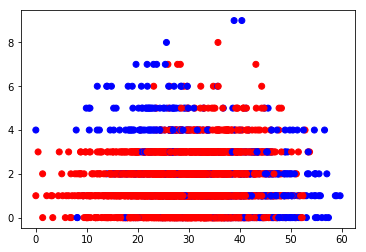

In [11]:
plt.scatter(df[' tdchar'], df[' ncsc'],c=df[' label'],cmap=ListedColormap(['#FF0000','#0000FF']));

# we found df[' tdchar'], df[' tdmin'] are linearly dependent

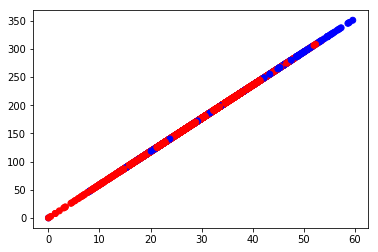

In [12]:
plt.scatter(df[' tdchar'], df[' tdmin'],c=df[' label'],cmap=ListedColormap(['#FF0000','#0000FF']));

/home/debanjan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


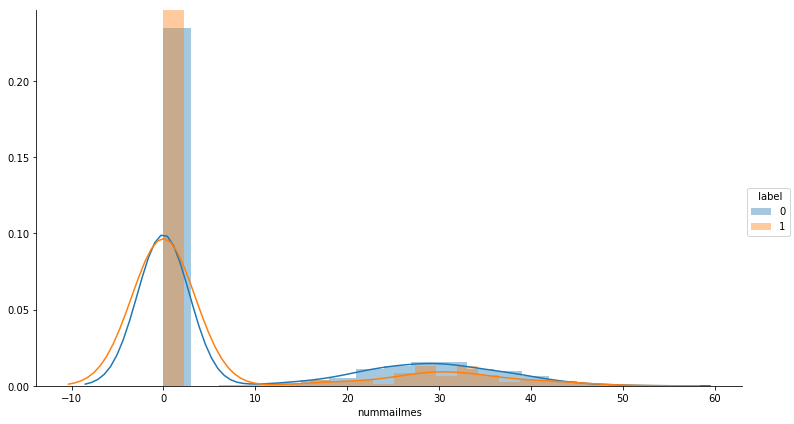

In [13]:
sns.FacetGrid(df,hue=' label',size=6, aspect = 1.75).map(sns.distplot, 'nummailmes').add_legend();

/home/debanjan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


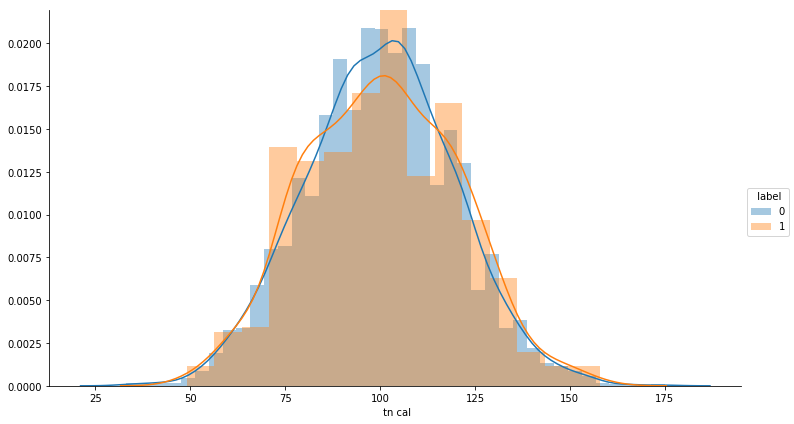

In [14]:
sns.FacetGrid(df,hue=' label',size=6, aspect = 1.75).map(sns.distplot, ' tn cal').add_legend();

/home/debanjan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


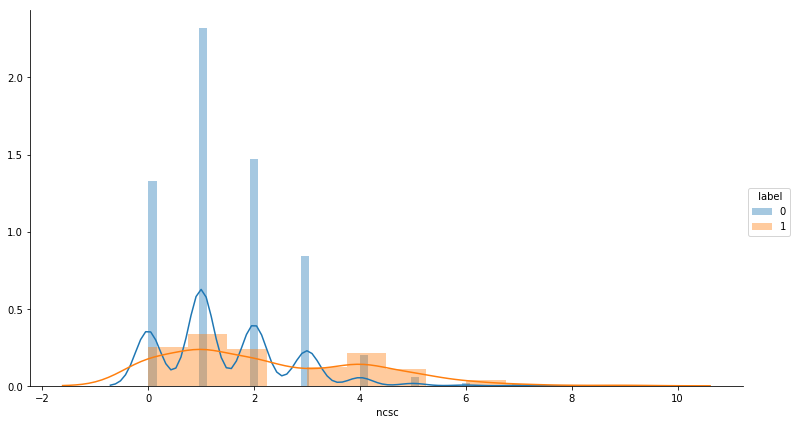

In [15]:
sns.FacetGrid(df,hue=' label',size=6, aspect = 1.75).map(sns.distplot, ' ncsc').add_legend();

/home/debanjan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


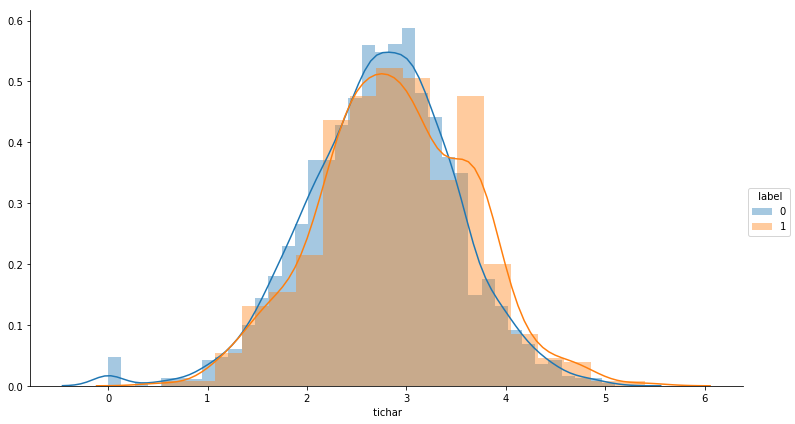

In [16]:
sns.FacetGrid(df,hue=' label',size=6, aspect = 1.75).map(sns.distplot, ' tichar').add_legend();

/home/debanjan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


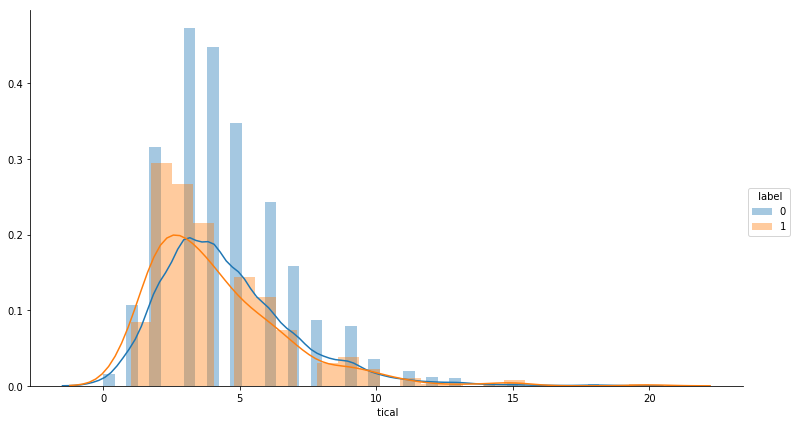

In [17]:
sns.FacetGrid(df,hue=' label',size=6, aspect = 1.75).map(sns.distplot, ' tical').add_legend();

/home/debanjan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


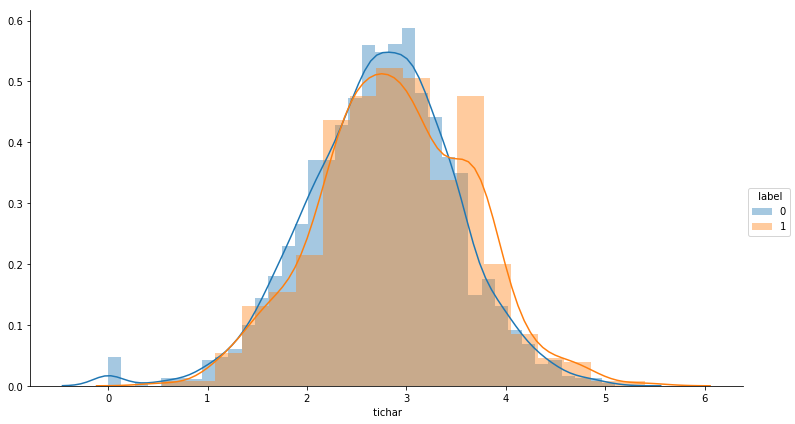

In [18]:
sns.FacetGrid(df,hue=' label',size=6, aspect = 1.75).map(sns.distplot, ' tichar').add_legend();

/home/debanjan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


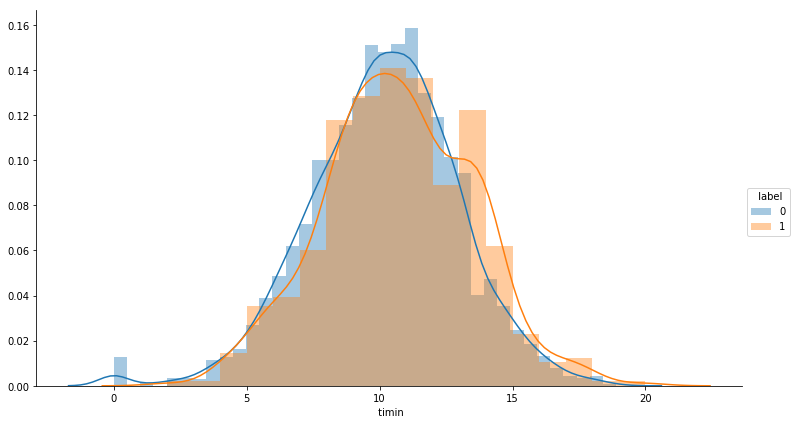

In [19]:
sns.FacetGrid(df,hue=' label',size=6, aspect = 1.75).map(sns.distplot, ' timin').add_legend();

/home/debanjan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


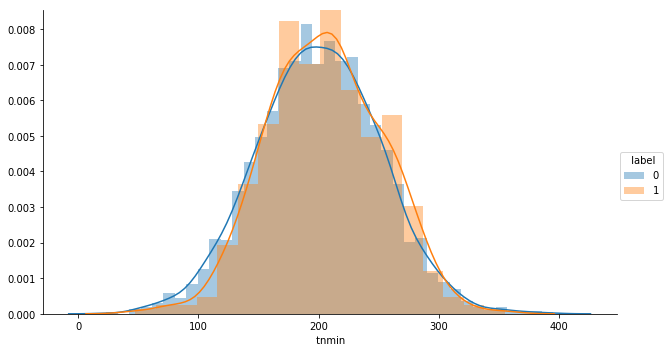

In [20]:
sns.FacetGrid(df,hue=' label',size=5, aspect = 1.75).map(sns.distplot, ' tnmin').add_legend();

/home/debanjan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


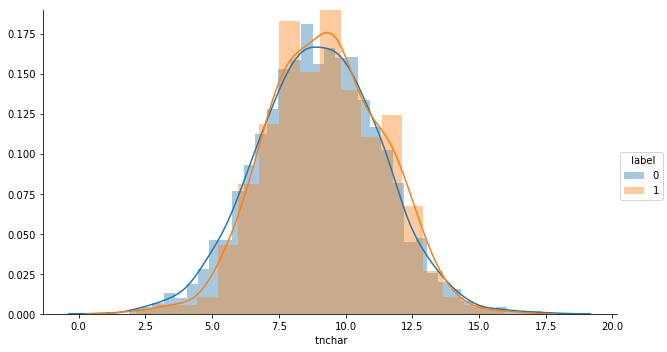

In [21]:
sns.FacetGrid(df,hue=' label',size=5, aspect = 1.75).map(sns.distplot, ' tnchar').add_legend();

# starting multivariate analysis

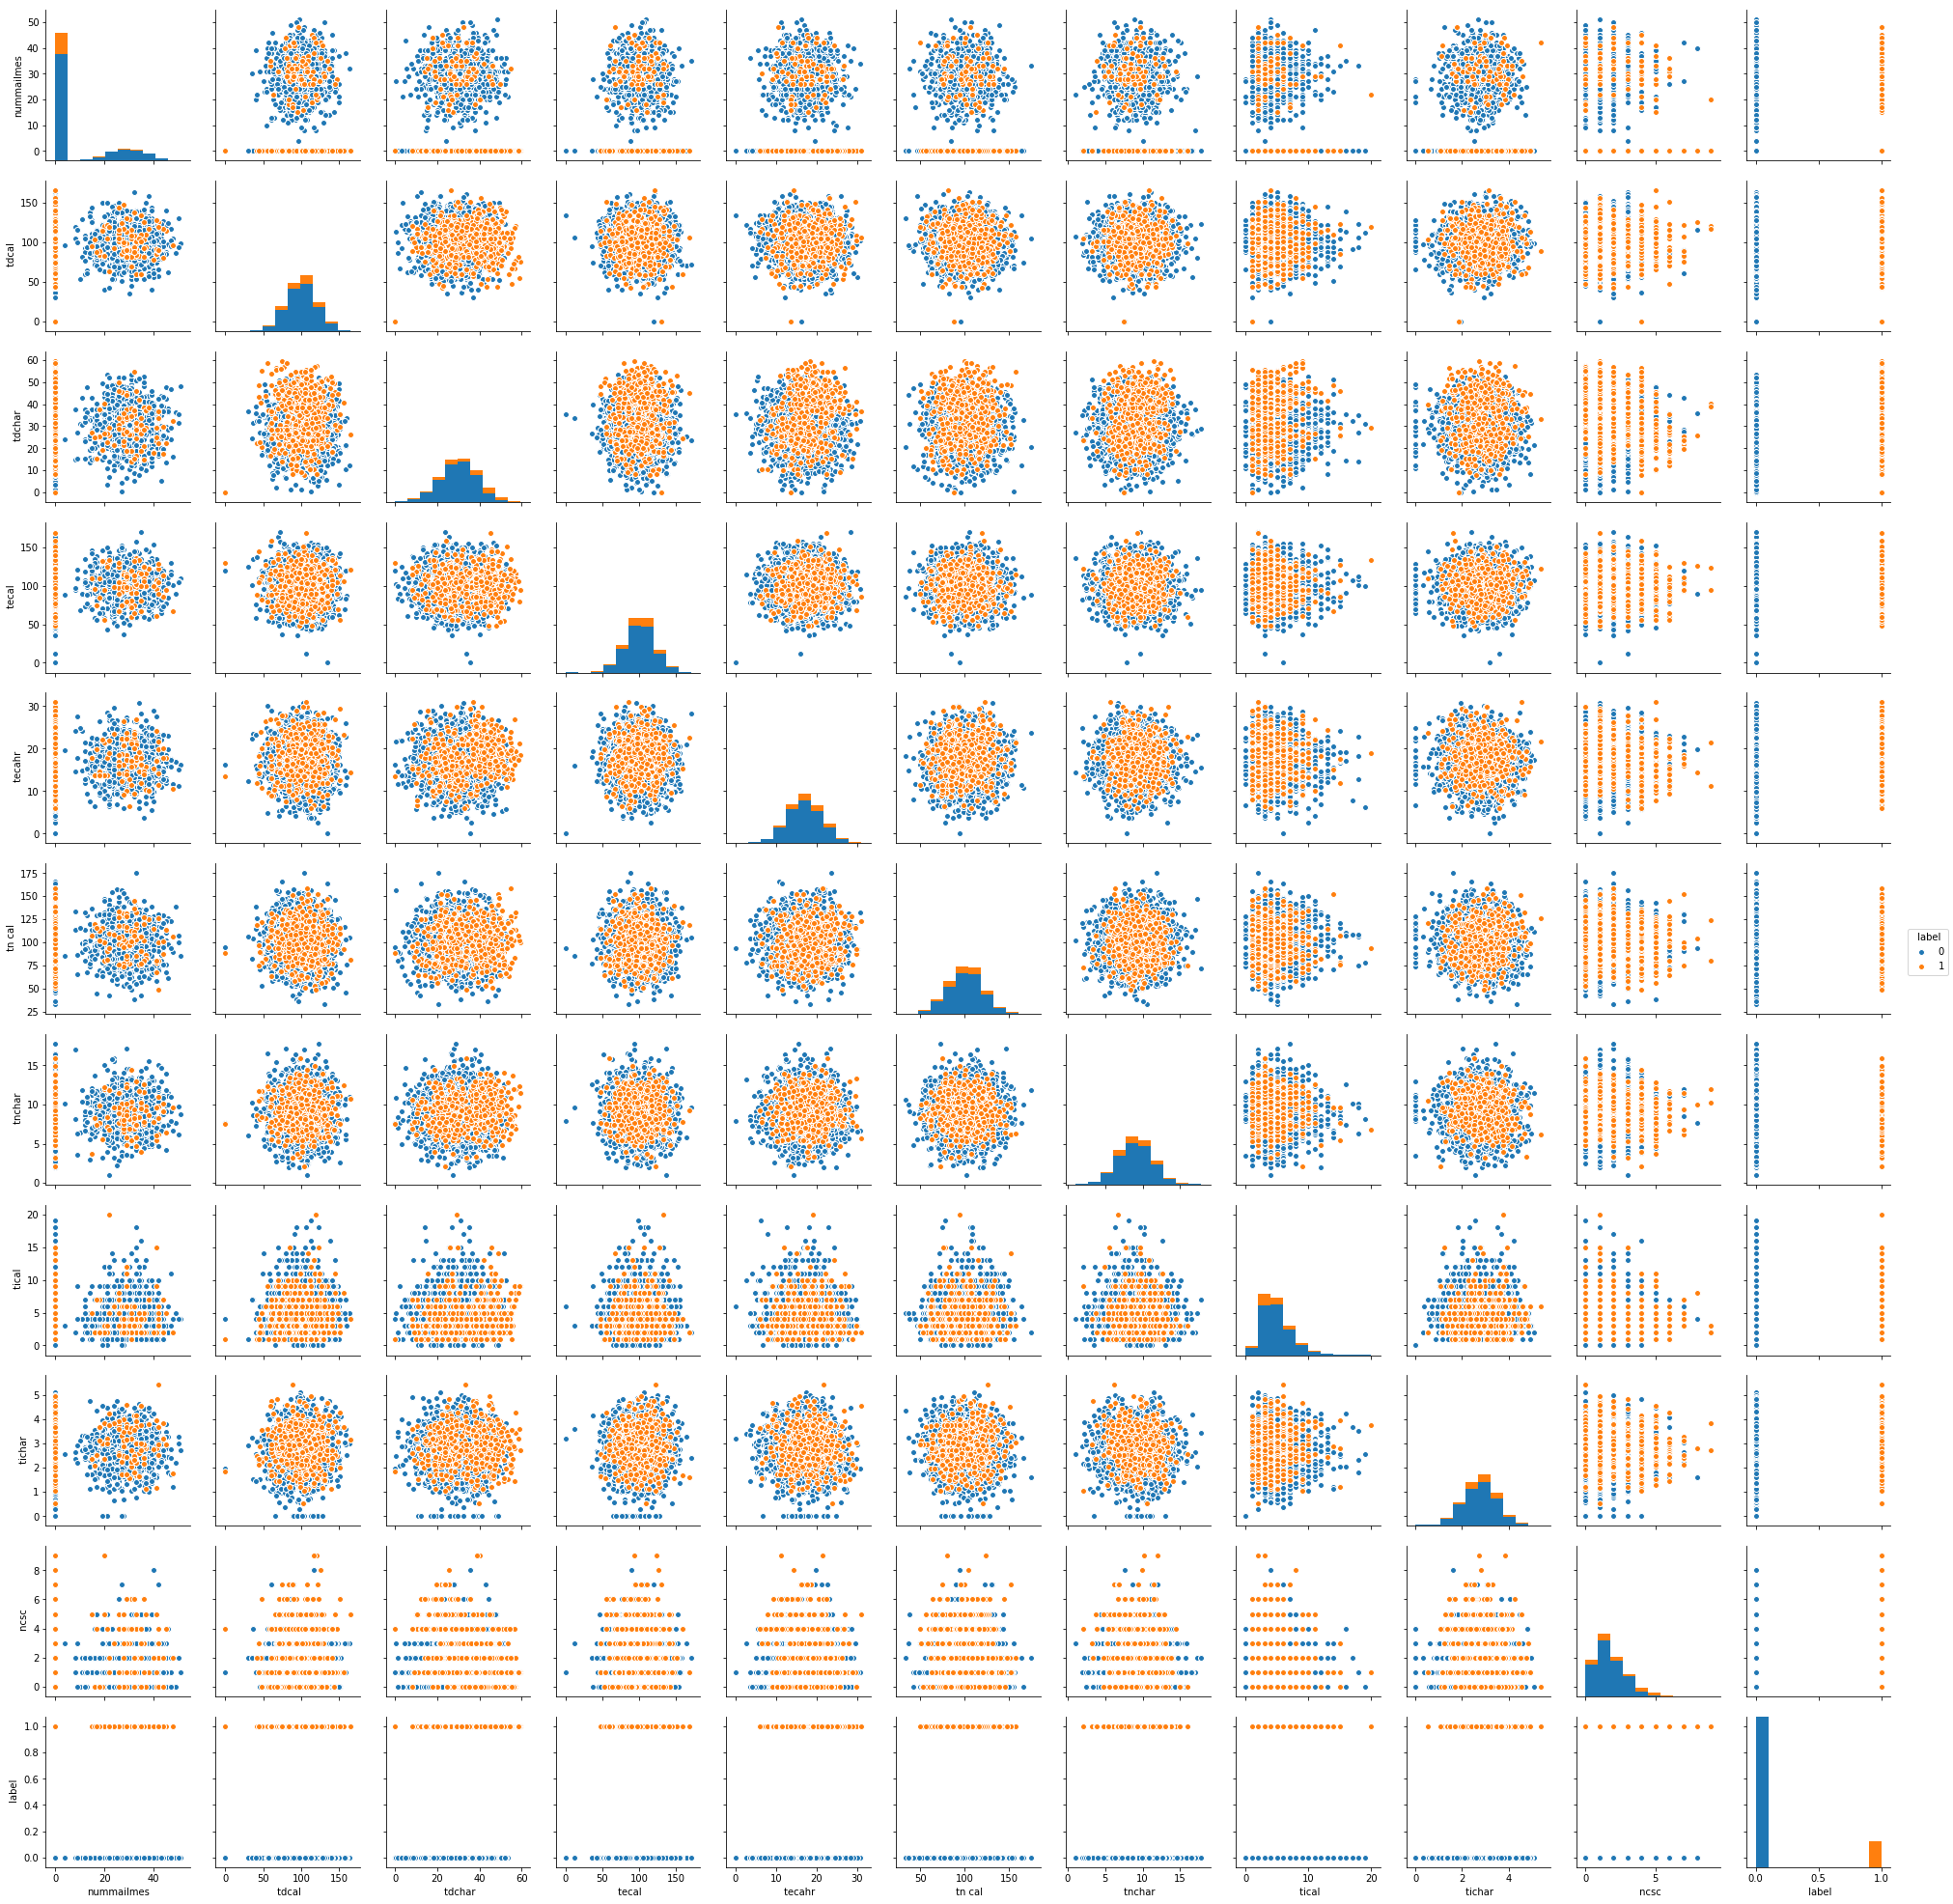

In [22]:
sns.pairplot(df[['nummailmes', ' tdcal', ' tdchar', ' tecal',
       ' tecahr', ' tn cal', ' tnchar', ' tical',
       ' tichar', ' ncsc',' label']],hue=' label');

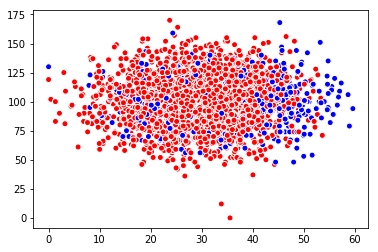

In [23]:
plt.scatter(df[' tdchar'], df[' tecal'],c=df[' label'],cmap=ListedColormap(['#FF0000','#0000FF']),marker='o',edgecolors='w');

# we are taking 3 features at a time to see that if there is any seperation/pattern in higher dimension or not

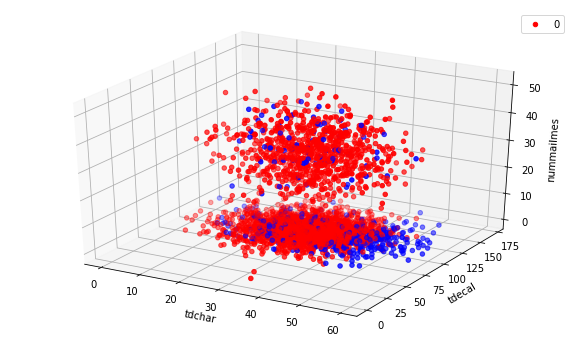

In [24]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df[' tdchar'],df[' tecal'],df['nummailmes'],c=df[' label'],cmap=ListedColormap(['#FF0000','#0000FF']))
ax.set_xlabel('tdchar')
ax.set_ylabel('tdecal')
ax.set_zlabel('nummailmes');
ax.legend(df[' label']);


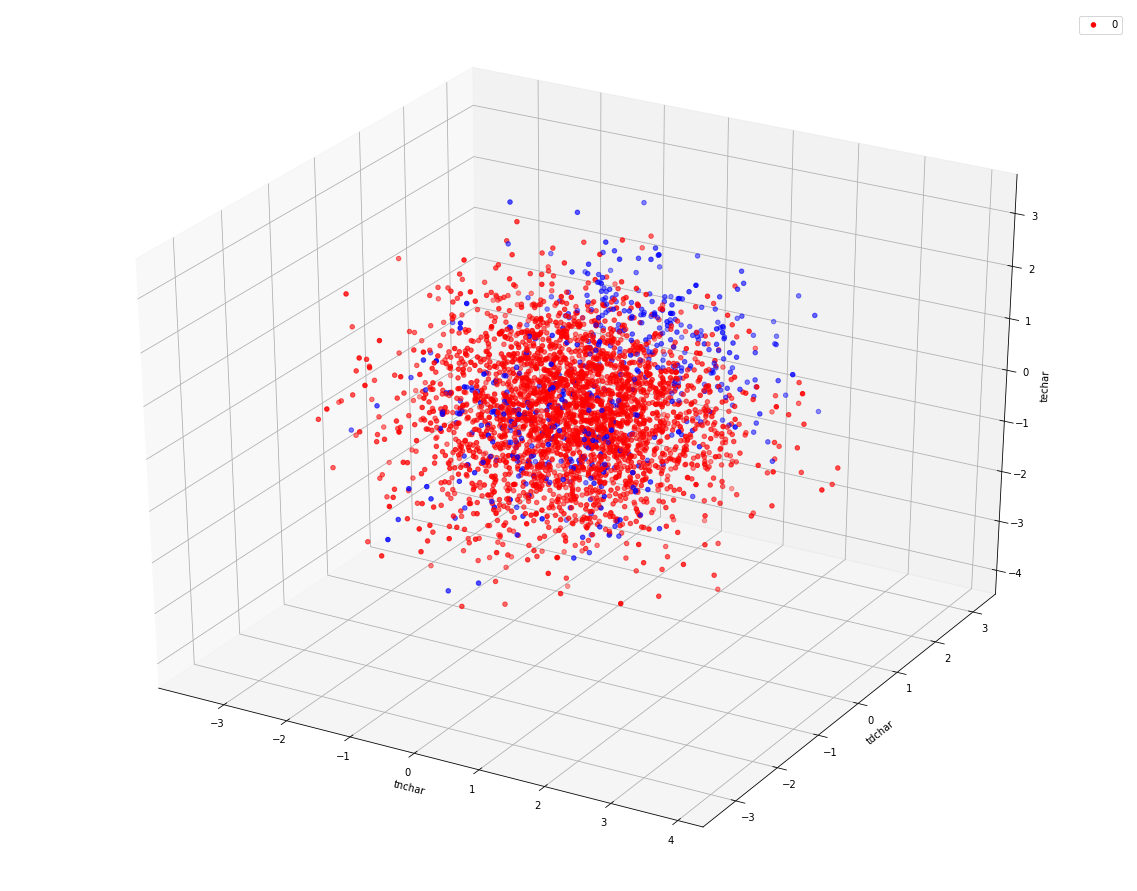

In [25]:
fig = plt.figure(figsize = (20,16))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[' tnchar'],x[' tdchar'],x[' tecahr'],c=x[' label'],cmap=ListedColormap(['#FF0000','#0000FF']))
ax.set_xlabel('tnchar')
ax.set_ylabel('tdchar')
ax.set_zlabel('techar');
ax.legend(df[' label']);


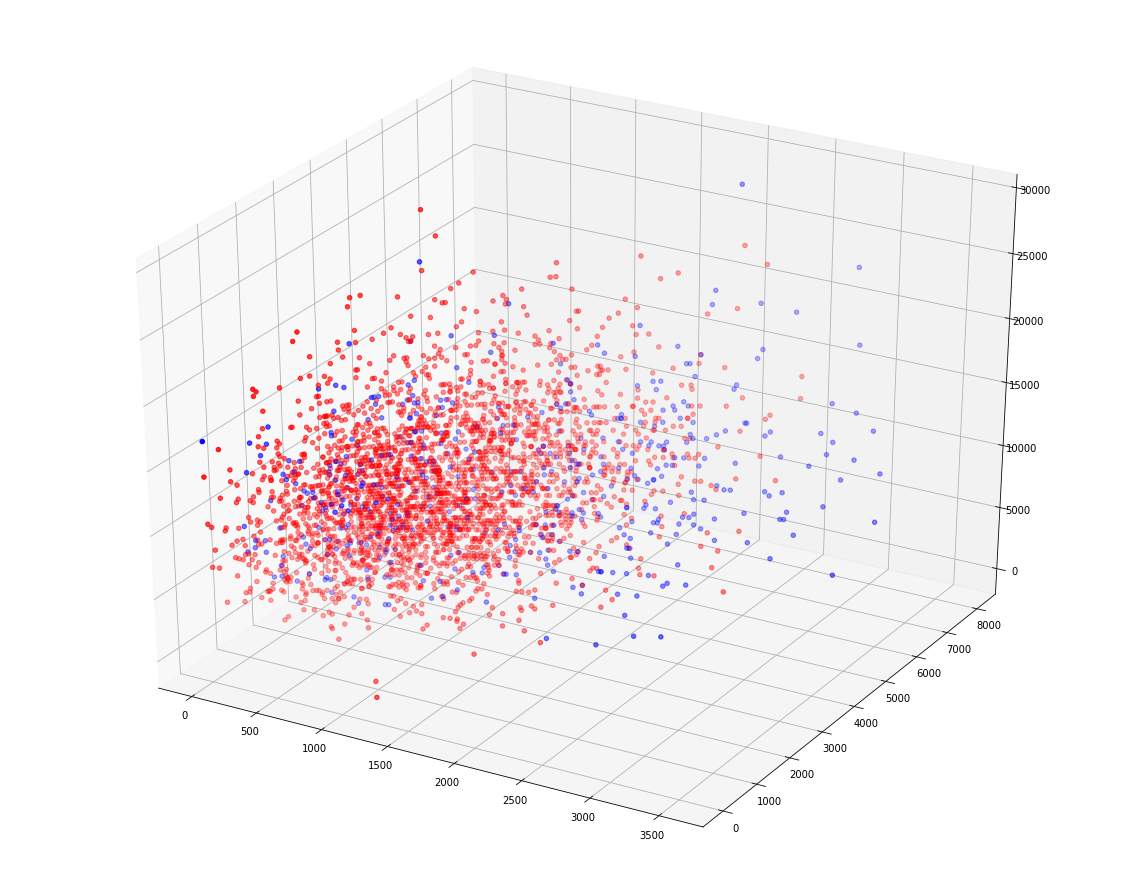

In [26]:
fig = plt.figure(figsize = (20,16))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df[' tdchar']**2,df[' tdchar']*df[' tecal'],df[' tecal']**2,c=df[' label'],cmap=ListedColormap(['#FF0000','#0000FF']));


# we found that those people who are using internet plan are churning more than others who are not using it. so it possible that customers are not satisfied with the internet plan or may be it's charges

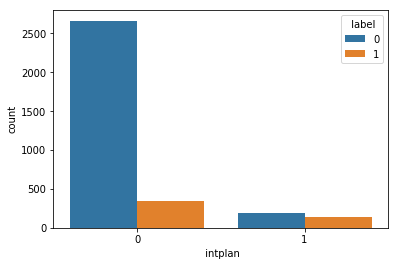

In [27]:
sns.countplot(df[' intplan'],hue=df[' label']);

# we observed that those people who do not have voice  plan are churning more. so it possible that customers are not satisfied with the voice plan or may be it's charges.so we can offer them low cost voice packs so that they can subscribe to  voice plan  or we can check in the particular state if there is any problem with the network.

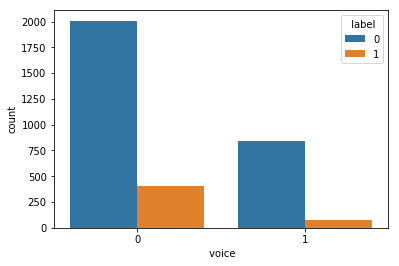

In [28]:
sns.countplot(df[' voice'],hue=df[' label']);

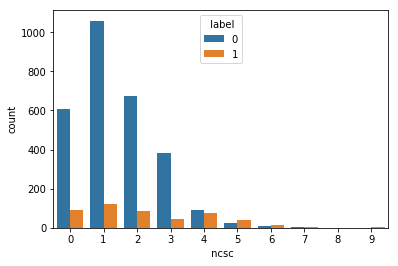

In [29]:
sns.countplot(df[' ncsc'],hue=df[' label']);

# we found that those people who are getting more  customer service call are churning more than others. so it may be beneficial to reduce the no of customer service call to some extent.

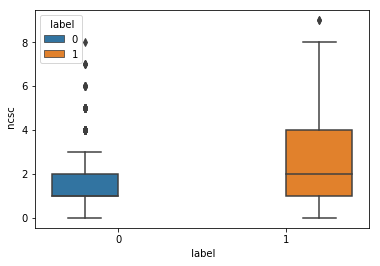

In [30]:
sns.boxplot(x=df[' label'],y=df[' ncsc'],hue=df[' label']);

# we found that those people who have total day charges above 36-37 are churning more than others. so it may be beneficial to give them power packs for total day charges if tdchar is above 36-37.

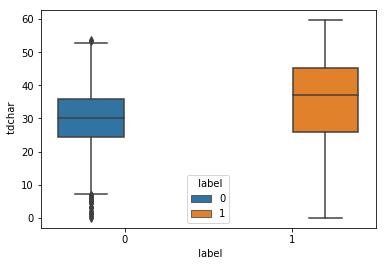

In [31]:
sns.boxplot(x=df[' label'],y=df[' tdchar'],hue=df[' label']);

# we observed that those people who are calling more than 220 total day minutes are churning more than others. so it may be good policy  to give them offers related to total day minutes if tdmin is above 220

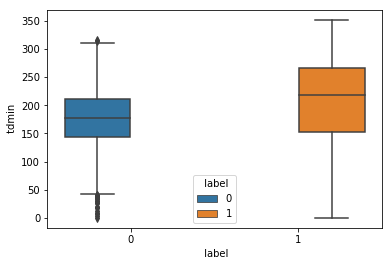

In [32]:
sns.boxplot(x=df[' label'],y=df[' tdmin'],hue=df[' label']);

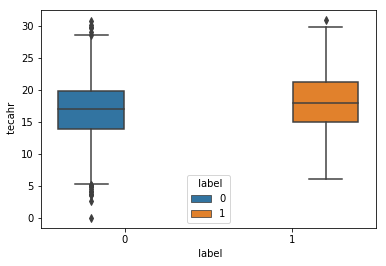

In [33]:
sns.boxplot(x=df[' label'],y=df[' tecahr'],hue=df[' label']);

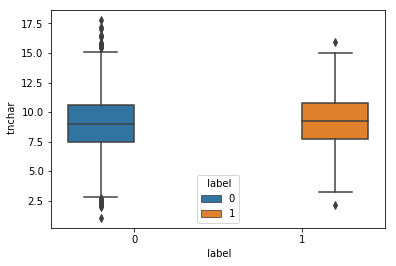

In [34]:
sns.boxplot(x=df[' label'],y=df[' tnchar'],hue=df[' label']);

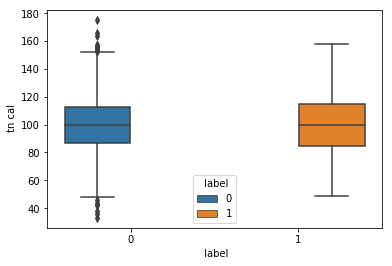

In [35]:
sns.boxplot(x=df[' label'],y=df[' tn cal'],hue=df[' label']);

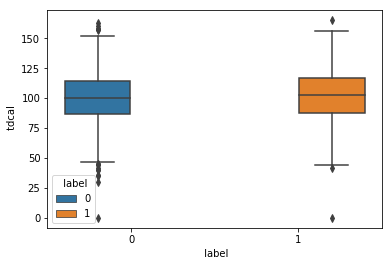

In [36]:
sns.boxplot(x=df[' label'],y=df[' tdcal'],hue=df[' label']);

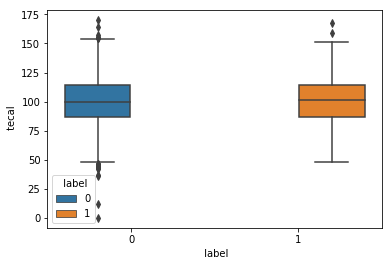

In [37]:
sns.boxplot(x=df[' label'],y=df[' tecal'],hue=df[' label']);


# we observed that those people who have few ( may be 0 or 1 )no of email messages  are churning more.so it may be good policy to give them offers such that customer can get/send email messages bearing no cost if nummailmes is lower(0 or 1).

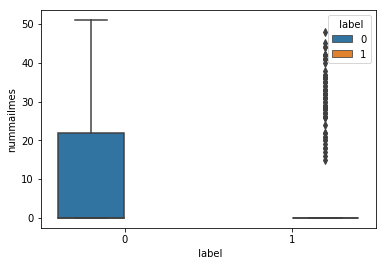

In [38]:
sns.boxplot(x=df[' label'],y=df['nummailmes'],hue=df[' label']);

# we observed that those people who do not have voice plan are churning more. so it possible that customers are not satisfied with the voice paln or may be it's charges.so we can offer them low cost voice packs or check in the particular state if there is any problem with the network.

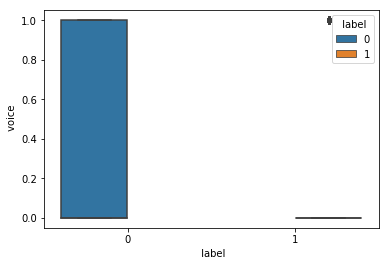

In [39]:
sns.boxplot(x=df[' label'],y=df[' voice'],hue=df[' label']);

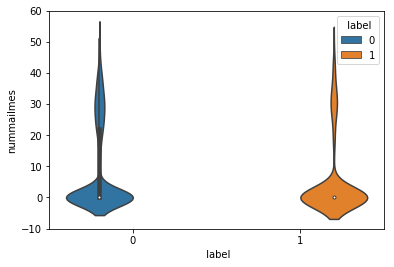

In [40]:
sns.violinplot(x=df[' label'],y=df['nummailmes'],hue=df[' label']);

# we will split our current DataFrame by ' label' and ' intplan' and count no of elements each feature gets

In [41]:
#df.groupby(func, axis=1)
df.groupby([' label', ' intplan']).count()

AL    AR    AZ    CA    CO    CT    DC    DE    FL    GA  \
 label  intplan                                                               
0      0         2664  2664  2664  2664  2664  2664  2664  2664  2664  2664   
       1          186   186   186   186   186   186   186   186   186   186   
1      0          346   346   346   346   346   346   346   346   346   346   
       1          137   137   137   137   137   137   137   137   137   137   

                 ...     temin   tecal   tecahr   tnmin   tn cal   tnchar  \
 label  intplan  ...                                                        
0      0         ...      2664    2664     2664    2664     2664     2664   
       1         ...       186     186      186     186      186      186   
1      0         ...       346     346      346     346      346      346   
       1         ...       137     137      137     137      137      137   

                  timin   tical   tichar   ncsc  
 label  intplan                                  
0      0           2664    2664     2664   2664  
       1            186     186      186    186  
1      0            346     346      346    346  
       1            137     137      137    137  

[4 rows x 68 columns]

In [42]:
print(186/(186+2664))
print(137/(137+346))

0.06526315789473684
0.2836438923395445


Only 6.52% of the people who have not churned the network were using internet paln but 28.36% of the people who have churned were using internet plan. People, churned may be unsatisfied with the internet plan.

# we will split our current DataFrame by ' label' and ' voice' and count no of elements each feature gets

In [43]:
df.groupby([' label', ' voice']).count()

AL    AR    AZ    CA    CO    CT    DC    DE    FL    GA  \
 label  voice                                                               
0      0       2008  2008  2008  2008  2008  2008  2008  2008  2008  2008   
       1        842   842   842   842   842   842   842   842   842   842   
1      0        403   403   403   403   403   403   403   403   403   403   
       1         80    80    80    80    80    80    80    80    80    80   

               ...     temin   tecal   tecahr   tnmin   tn cal   tnchar  \
 label  voice  ...                                                        
0      0       ...      2008    2008     2008    2008     2008     2008   
       1       ...       842     842      842     842      842      842   
1      0       ...       403     403      403     403      403      403   
       1       ...        80      80       80      80       80       80   

                timin   tical   tichar   ncsc  
 label  voice                                  
0      0         2008    2008     2008   2008  
       1          842     842      842    842  
1      0          403     403      403    403  
       1           80      80       80     80  

[4 rows x 68 columns]

In [44]:
print(842/(842+2008))
print(80/(80+403))

0.29543859649122806
0.16563146997929606


Only 29.54% of the people who have not churned  were using voice paln but 16.56% of the people who have churned were using voice plan. People, churned may be unsatisfied with the ivoice plan.

In [45]:
df.columns

Index(['AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA',
       'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO',
       'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK',
       'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI',
       'WV', 'WY', ' acclen', ' arcode', ' phnum', ' intplan', ' voice',
       'nummailmes', ' tdmin', ' tdcal', ' tdchar', ' temin', ' tecal',
       ' tecahr', ' tnmin', ' tn cal', ' tnchar', ' timin', ' tical',
       ' tichar', ' ncsc', ' label'],
      dtype='object')

# we found that those people who have sum of total charges of all type above 65 are churning more . so it may be beneficial to give them power packs for total charges if ( tdchar + tecahr + tnchar ) is above 65

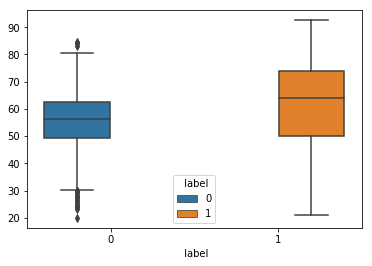

In [46]:
sns.boxplot(x=df[' label'],y=df[' tdchar']+df[' tecahr']+df[' tnchar'],hue=df[' label']);

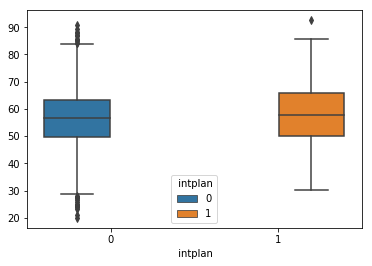

In [47]:
sns.boxplot(x=df[' intplan'],y=df[' tdchar']+df[' tecahr']+df[' tnchar'],hue=df[' intplan']);

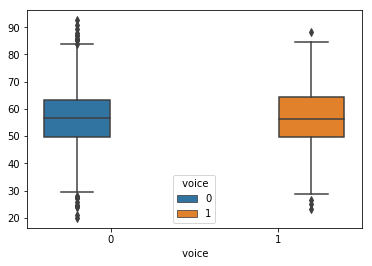

In [48]:
sns.boxplot(x=df[' voice'],y=df[' tdchar']+df[' tecahr']+df[' tnchar'],hue=df[' voice']);

# In the above we have considered 'st' to be important so we are dropping 'arcode'. generally there is no relation between customer churn with the ' arcode' and ' phnum'.so we also drop them.since ' tdmin' and 'tdchar' ,' temin' and 'techar' , ' 'tnmin'  and 'tnchar', ' timin' and 'tichar' are linearly dependent.so we can consider any one of the pair and drop the other one.

# after dropping irrelevant features we  Split dataframe into random train and test subsets of testsize 20%

In [49]:
X_train, X_test, y_train, y_test = train_test_split(df.drop([' acclen', ' arcode', ' phnum', ' tdmin', ' temin', ' tnmin', ' timin', ' label'],axis=1),df[' label'],test_size=0.2,random_state=101)

# applying LogisticRegression model for classification and printing  classification report, confusion matrix,accuracy score and plotting ROC curve

             precision    recall  f1-score   support

          0       0.89      0.96      0.93       585
          1       0.41      0.18      0.25        82

avg / total       0.83      0.87      0.84       667

[[563  22]
 [ 67  15]]
0.8665667166416792


/home/debanjan/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


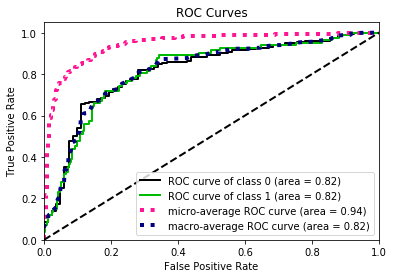

In [50]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(df.drop([' acclen',' temin', ' tnmin', ' timin', ' arcode', ' tdmin', ' phnum',' label',],axis=1),df[' label'],test_size=0.2,random_state=1001)
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train,y_train)
y_pred = lg.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
plot_roc_curve(y_test,lg.predict_proba(X_test));

In [51]:
from sklearn.model_selection import cross_val_score
lg = LogisticRegression()
lg = lg.fit(X_train, y_train)
cross_val_score(lg,X_test, y_test,cv=5).mean()

0.8755582987319045

# applying KNeighbors Classifier for k  value between (1,50) and plotting error vs k value to find the k value for which error is minimum

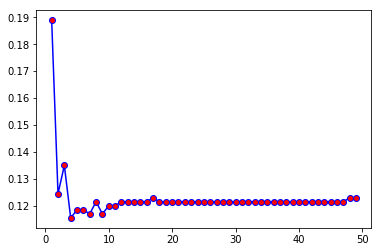

In [52]:
from sklearn.neighbors import KNeighborsClassifier
error = []
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error.append((pred!=y_test).sum()/len(pred))
error
xx = np.array(range(1,50))
plt.plot(xx,error,marker='o',color='b',markerfacecolor='r');


# applying KNeighbors Classifier for k=13 and printing classification report, confusion matrix,accuracy score and plotting ROC curve

             precision    recall  f1-score   support

          0       0.88      1.00      0.94       585
          1       0.67      0.02      0.05        82

avg / total       0.85      0.88      0.83       667

0.8785607196401799


/home/debanjan/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


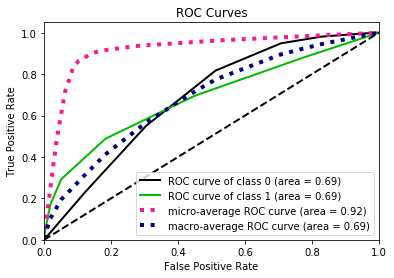

In [53]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 13)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print(classification_report(y_test, pred))
print(accuracy_score(y_test, pred))
plot_roc_curve(y_test,knn.predict_proba(X_test))
#X_train

# applying GaussianNB Classifier and printing classification report, confusion matrix,accuracy score and plotting ROC curve

             precision    recall  f1-score   support

          0       0.91      0.62      0.73       585
          1       0.17      0.55      0.26        82

avg / total       0.82      0.61      0.67       667

[[360 225]
 [ 37  45]]
0.6071964017991005


/home/debanjan/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


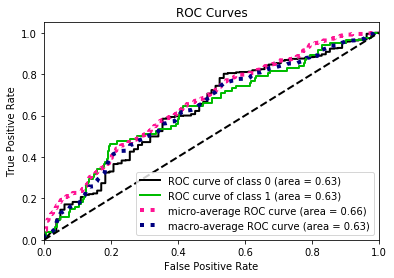

In [54]:
from sklearn.naive_bayes import GaussianNB
#X_train, X_test, y_train, y_test = train_test_split(df.drop([' acclen', ' arcode', ' phnum',' label'],axis=1),df[' label'],test_size=0.2,random_state=101)
gnb = GaussianNB()
gnb.fit(X_train,y_train)
pred=gnb.predict(X_test)
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
print(accuracy_score(y_test,pred))
plot_roc_curve(y_test,gnb.predict_proba(X_test))

#  applying MultinomialNB Classifier and printing classification report, confusion matrix,accuracy score and plotting ROC curve

             precision    recall  f1-score   support

          0       0.91      0.66      0.76       585
          1       0.18      0.52      0.27        82

avg / total       0.82      0.64      0.70       667

[[386 199]
 [ 39  43]]
0.6431784107946027


/home/debanjan/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


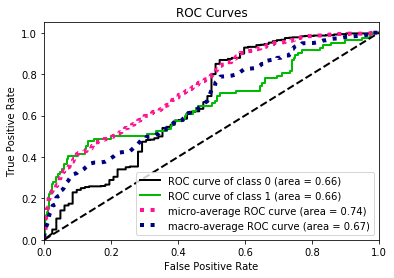

In [55]:
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(df.drop([' acclen', ' arcode', ' phnum',' label'],axis=1),df[' label'],test_size=0.2,random_state=101)
mnb = MultinomialNB()
mnb.fit(X_train,y_train)
pred=mnb.predict(X_test)
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
print(accuracy_score(y_test,pred))
plot_roc_curve(y_test,mnb.predict_proba(X_test))

# applying BernoulliNB Classifier and printing classification report, confusion matrix,accuracy score and plotting ROC curve

             precision    recall  f1-score   support

          0       0.89      0.97      0.93       585
          1       0.41      0.13      0.20        82

avg / total       0.83      0.87      0.84       667

[[569  16]
 [ 71  11]]
0.8695652173913043


/home/debanjan/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


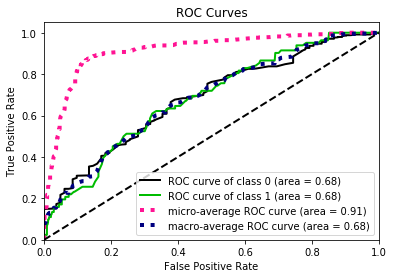

In [56]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train,y_train)
pred=bnb.predict(X_test)
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
print(accuracy_score(y_test,pred))
plot_roc_curve(y_test,bnb.predict_proba(X_test))

# applying Support Vector  Classifier and printing classification report, confusion matrix,accuracy score and plotting ROC curve

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       585
          1       1.00      1.00      1.00        82

avg / total       1.00      1.00      1.00       667

[[585   0]
 [  0  82]]
1.0


/home/debanjan/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


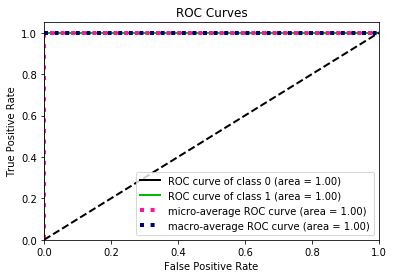

In [57]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,df[' label'],test_size=0.2,random_state=101)
svc = SVC(C=10,gamma=0.01,kernel='rbf',tol=1e-6, probability=True)
svc.fit(X_train,y_train);
y_pred=svc.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
plot_roc_curve(y_test,svc.predict_proba(X_test))

# we are changing the C( error term ),gamma( Kernel coefficient ),tol( Tolerance for stopping criterion ) value to get better accuracy.Here we are using 'polly' kernel.

In [58]:
#X_train, X_test, y_train, y_test = train_test_split(x,df[' label'],test_size=0.2,random_state=101)
svc = SVC(C=10,gamma=0.01,kernel='poly',tol=1e-6)
svc.fit(X_train,y_train);
y_pred=svc.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       585
          1       1.00      0.98      0.99        82

avg / total       1.00      1.00      1.00       667

[[585   0]
 [  2  80]]
0.9970014992503748


# Here we are using 'sigmoid' kernel.

In [59]:
X_train, X_test, y_train, y_test = train_test_split(x,df[' label'],test_size=0.2,random_state=101)
svc = SVC(C=10,gamma=0.01,kernel='sigmoid',tol=1e-6,probability=True)
svc.fit(X_train,y_train);
y_pred=svc.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       585
          1       1.00      1.00      1.00        82

avg / total       1.00      1.00      1.00       667

[[585   0]
 [  0  82]]
1.0


# Here we are using 'rbf' kernel.

In [60]:
from sklearn.svm import SVC
svc = SVC(C=100,gamma=0.001,kernel='rbf',tol=1e-6)
svc.fit(X_train,y_train);
cross_val_score(svc,X_test, y_test,cv=3).mean()

1.0

# applying DecisionTree Classifier and printing classification report, confusion matrix,accuracy score and plotting ROC curve and drawing DecisionTree

/home/debanjan/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


             precision    recall  f1-score   support

          0       0.96      0.99      0.97       585
          1       0.87      0.67      0.76        82

avg / total       0.95      0.95      0.94       667

[[577   8]
 [ 27  55]]
0.9475262368815592


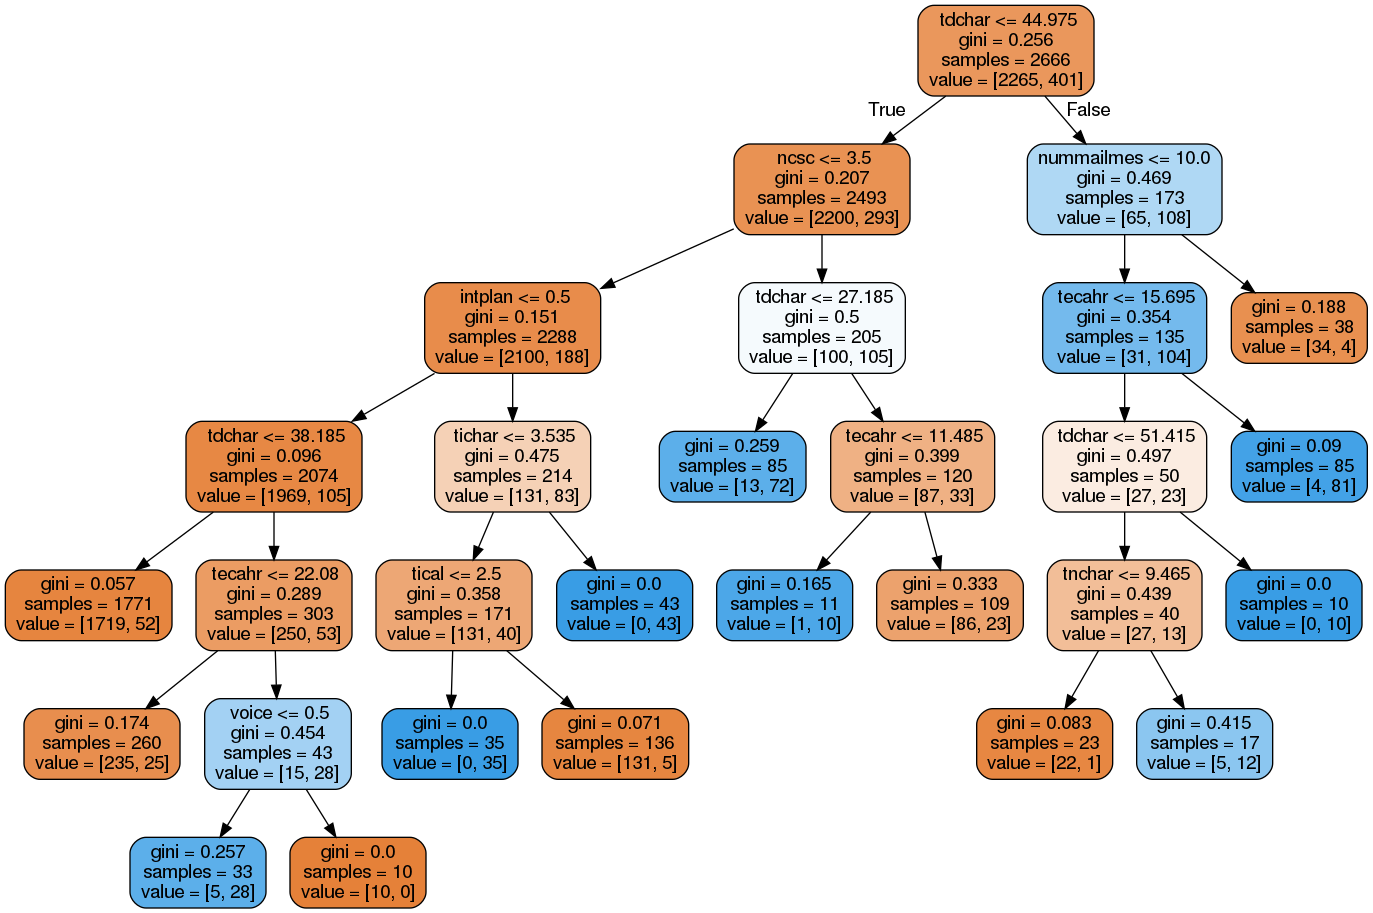

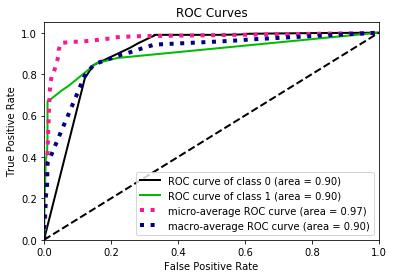

In [61]:
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image
from sklearn import tree
from sklearn.externals.six import StringIO
import pydot
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop([' acclen', ' arcode', ' phnum', ' tdmin', ' temin', ' tnmin', ' timin', ' label'],axis=1),df[' label'],test_size=0.2,random_state=101)

dot_data = StringIO()
dtc = DecisionTreeClassifier(max_depth=10, max_leaf_nodes=15)
dtc = dtc.fit(X_train,y_train)
#print(df.columns)
y_pred = dtc.predict(X_test)
plot_roc_curve(y_test,dtc.predict_proba(X_test))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
tree.export_graphviz(dtc,out_file=dot_data, feature_names=['AL', 'AR', 'AZ', 'CA', 'CO', 'CT',
        'DC', 'DE', 'FL', 'GA', 'HI', 'IA',
       'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO',
       'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK',
       'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI',
       'WV', 'WY', ' intplan', ' voice',
       'nummailmes', ' tdcal', ' tdchar', ' tecal',
       ' tecahr', ' tn cal', ' tnchar', ' tical',
       ' tichar', ' ncsc'], filled= True,rounded=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png(),height=10)
#plot_roc_curve(y_test,lg.predict_proba(X_test))

# applying RandomForest Classifier using cross val score and printing classification report, confusion matrix,accuracy score and plotting ROC curve

In [62]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
a=[]
for i in range(100):
    a.append(cross_val_score(rfc, X_test, y_test, cv=3).mean())
np.array(a).mean()

0.8869287897763235

# applying Linear Discriminant Analysis Classifier and printing classification report, confusion matrix,accuracy score and plotting ROC curve 

             precision    recall  f1-score   support

          0       0.90      0.94      0.92       585
          1       0.38      0.26      0.31        82

avg / total       0.84      0.86      0.85       667

[[551  34]
 [ 61  21]]
0.8575712143928036


/home/debanjan/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


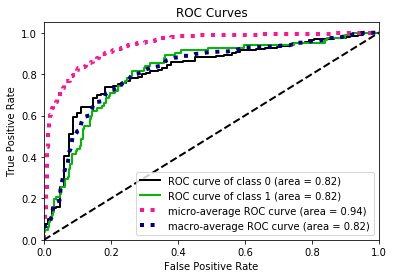

In [63]:
#X_train, X_test, y_train, y_test = train_test_split(x,df[' label'],test_size=0.2,random_state=101)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)
pred=lda.predict(X_test)
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
print(accuracy_score(y_test, pred))
plot_roc_curve(y_test,lda.predict_proba(X_test))

# applying Quadratic Discriminant Analysis Classifier and printing classification report, confusion matrix,accuracy score and plotting ROC curve 

             precision    recall  f1-score   support

          0       0.93      0.66      0.77       585
          1       0.20      0.62      0.31        82

avg / total       0.84      0.65      0.71       667

[[385 200]
 [ 31  51]]
0.6536731634182908


/home/debanjan/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


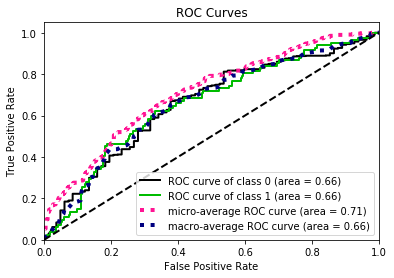

In [64]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train,y_train)
pred=qda.predict(X_test)
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
print(accuracy_score(y_test,pred))
plot_roc_curve(y_test,qda.predict_proba(X_test))

# applying Gaussian Process Classifier and printing classification report, confusion matrix,accuracy score and plotting ROC curve

             precision    recall  f1-score   support

          0       0.89      0.89      0.89       585
          1       0.24      0.24      0.24        82

avg / total       0.81      0.81      0.81       667

[[521  64]
 [ 62  20]]
0.8110944527736131


/home/debanjan/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


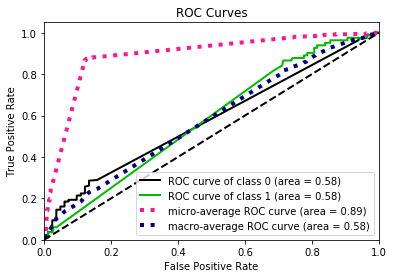

In [65]:
from sklearn.gaussian_process import GaussianProcessClassifier
gpc = GaussianProcessClassifier()
gpc.fit(X_train,y_train)
pred = gpc.predict(X_test)
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
print(accuracy_score(y_test,pred))
plot_roc_curve(y_test,gpc.predict_proba(X_test))

# applying AdaBoost Classifier and printing classification report, confusion matrix,accuracy score and plotting ROC curve

             precision    recall  f1-score   support

          0       0.91      0.95      0.93       585
          1       0.52      0.37      0.43        82

avg / total       0.87      0.88      0.87       667

[[557  28]
 [ 52  30]]
0.8800599700149925


/home/debanjan/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


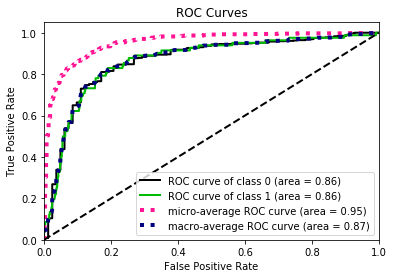

In [66]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
abc.fit(X_train, y_train)
pred = abc.predict(X_test)
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
print(accuracy_score(y_test,pred))
plot_roc_curve(y_test,abc.predict_proba(X_test))

# applying Bagging Classifier and printing classification report, confusion matrix,accuracy score and plotting ROC curve

             precision    recall  f1-score   support

          0       0.96      0.99      0.97       585
          1       0.88      0.71      0.78        82

avg / total       0.95      0.95      0.95       667

[[577   8]
 [ 24  58]]
0.952023988005997


/home/debanjan/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


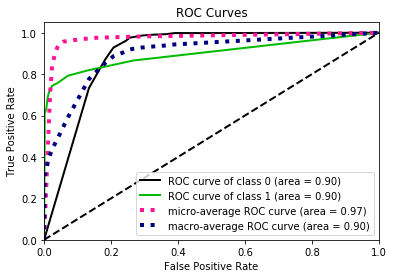

In [67]:
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier()
bc.fit(X_train, y_train)
pred = bc.predict(X_test)
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
print(accuracy_score(y_test,pred))
plot_roc_curve(y_test,bc.predict_proba(X_test))

# applying ExtraTrees Classifier and printing classification report, confusion matrix,accuracy score and plotting ROC curve

             precision    recall  f1-score   support

          0       0.92      0.98      0.95       585
          1       0.72      0.35      0.48        82

avg / total       0.89      0.90      0.89       667

[[574  11]
 [ 53  29]]
0.904047976011994


/home/debanjan/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


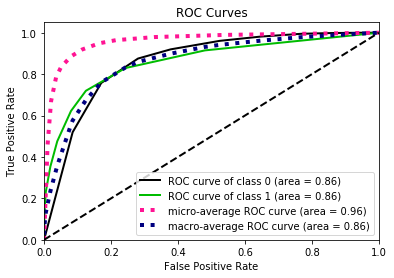

In [68]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)
pred = etc.predict(X_test)
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
print(accuracy_score(y_test,pred))
plot_roc_curve(y_test,etc.predict_proba(X_test));

# applying Gradient Boosting Classifier and printing classification report, confusion matrix,accuracy score and plotting ROC curve

             precision    recall  f1-score   support

          0       0.96      0.99      0.98       585
          1       0.94      0.72      0.81        82

avg / total       0.96      0.96      0.96       667

[[581   4]
 [ 23  59]]
0.95952023988006


/home/debanjan/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


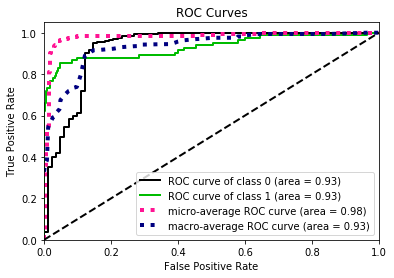

In [69]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
pred = gbc.predict(X_test)
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
print(accuracy_score(y_test,pred))
plot_roc_curve(y_test,gbc.predict_proba(X_test))

# applying Passive Aggressive Classifier and printing classification report, confusion matrix,accuracy score.

In [70]:
from sklearn.linear_model import PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier()
pac.fit(X_train, y_train)
pred = pac.predict(X_test)
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
print(accuracy_score(y_test,pred))
#plot_roc_curve(y_test,pac.predict_proba(X_test))

             precision    recall  f1-score   support

          0       0.88      1.00      0.94       585
          1       0.80      0.05      0.09        82

avg / total       0.87      0.88      0.83       667

[[584   1]
 [ 78   4]]
0.881559220389805


/home/debanjan/.local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


# applying Multilayer perceptron Classifier and printing classification report, confusion matrix,accuracy score and plotting ROC curve

             precision    recall  f1-score   support

          0       0.89      0.99      0.94       585
          1       0.71      0.12      0.21        82

avg / total       0.87      0.89      0.85       667

[[581   4]
 [ 72  10]]
0.8860569715142429


/home/debanjan/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


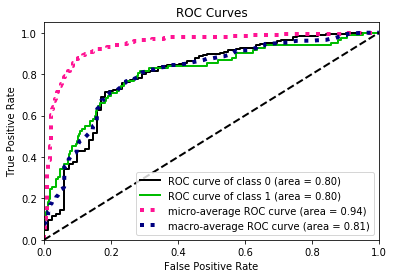

In [72]:
from sklearn.neural_network import MLPClassifier
mpc = MLPClassifier()
mpc.fit(X_train, y_train)
pred = mpc.predict(X_test)
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
print(accuracy_score(y_test,pred))
plot_roc_curve(y_test,mpc.predict_proba(X_test));